# ANZ Data Virtual Internship - Task 2

In [45]:
# Imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


#Pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# seaborn settings
sns.set_style("darkgrid")

## Importing dataset

In [46]:
# Import anz_data_clean.pickle from Task 1
data_clean = pd.read_pickle('anz_data_clean.pickle')
data_clean.head() # Sanity check

,status,card_present_flag,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,movement,long,lat,merchant_long,merchant_lat,weekday,time_hour,geometry
0,authorized,1.0,ACC-1598451071,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,debit,153.41,-27.95,153.38,-27.99,Wednesday,1,POINT (153.41000 -27.95000)
100,posted,NaN,ACC-1799207998,PAY/SALARY,NaN,Susan,1403.55,2018-08-01,F,20,NaN,NaN,2018-08-01T17:00:00.000+0000,1395.49,9767953f8ae94826aa145d6cac0be371,CUS-164374203,credit,150.68,-33.79,NaN,NaN,Wednesday,17,POINT (150.68000 -33.79000)
98,posted,NaN,ACC-2920611728,PAY/SALARY,NaN,Tyler,1969.05,2018-08-01,M,69,NaN,NaN,2018-08-01T17:00:00.000+0000,1043.12,360a8968ef944c9e91ee1f72a9759aec,CUS-1388323263,credit,144.96,-37.76,NaN,NaN,Wednesday,17,POINT (144.96000 -37.76000)
97,posted,NaN,ACC-819621312,PAY/SALARY,NaN,Michele,1244.45,2018-08-01,F,30,NaN,NaN,2018-08-01T17:00:00.000+0000,1158.15,148a346f380948cfa1ee8e5166b56a6e,CUS-1271030853,credit,145.04,-37.85,NaN,NaN,Wednesday,17,POINT (145.04000 -37.85000)
96,authorized,0.0,ACC-3879258709,POS,d8baa380-1cf2-485e-8b61-e6b73aab3400,Natasha,186344.95,2018-08-01,F,40,Ballarat,VIC,2018-08-01T16:45:20.000+0000,26.91,1eb22646ff724bfb9d3f3b8108abf785,CUS-527400765,debit,143.83,-37.66,143.81,-37.55,Wednesday,16,POINT (143.83000 -37.66000)


In [47]:
# Sanity check - checking data is still together
data_clean.shape

(11920, 24)

## Data preperation

In [48]:
# Obtaining annual salary from txn_description
data_clean['txn_description'].value_counts() # Pay/salary transactions account for 876 transactions

SALES-POS     3893
POS           3745
PAYMENT       2564
PAY/SALARY     876
INTER BANK     741
PHONE BANK     101
Name: txn_description, dtype: int64

In [56]:
# sort pay/salary by customer_id and take mean
salary = data_clean[data_clean['txn_description']=='PAY/SALARY'].groupby(['customer_id']).mean().reset_index()
salary.shape

(99, 10)

In [57]:
salary.head()

,customer_id,card_present_flag,balance,age,amount,long,lat,merchant_long,merchant_lat,time_hour
0,CUS-1005756958,NaN,4718.665385,53,970.47,153.03,-27.51,NaN,NaN,16
1,CUS-1117979751,NaN,11957.202857,21,3578.65,115.81,-31.82,NaN,NaN,11
2,CUS-1140341822,NaN,5841.720000,28,1916.51,144.97,-37.42,NaN,NaN,16
3,CUS-1147642491,NaN,8813.467692,34,1711.39,151.04,-33.77,NaN,NaN,11
4,CUS-1196156254,NaN,23845.717143,34,3903.73,138.52,-35.01,NaN,NaN,16


Above represents the average salary per customer over the 3 month period. 

In [53]:
salary['annual_salary'] = salary['amount']*12
salary.head()

,customer_id,card_present_flag,balance,age,amount,long,lat,merchant_long,merchant_lat,time_hour,annual_salary
0,CUS-1005756958,NaN,4718.665385,53,970.47,153.03,-27.51,NaN,NaN,16,11645.64
1,CUS-1117979751,NaN,11957.202857,21,3578.65,115.81,-31.82,NaN,NaN,11,42943.80
2,CUS-1140341822,NaN,5841.720000,28,1916.51,144.97,-37.42,NaN,NaN,16,22998.12
3,CUS-1147642491,NaN,8813.467692,34,1711.39,151.04,-33.77,NaN,NaN,11,20536.68
4,CUS-1196156254,NaN,23845.717143,34,3903.73,138.52,-35.01,NaN,NaN,16,46844.76


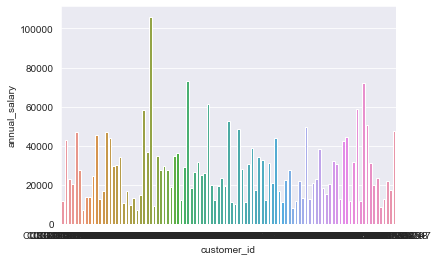

In [55]:
sns.barplot(x='customer_id', y='annual_salary', data=salary)
plt.show()